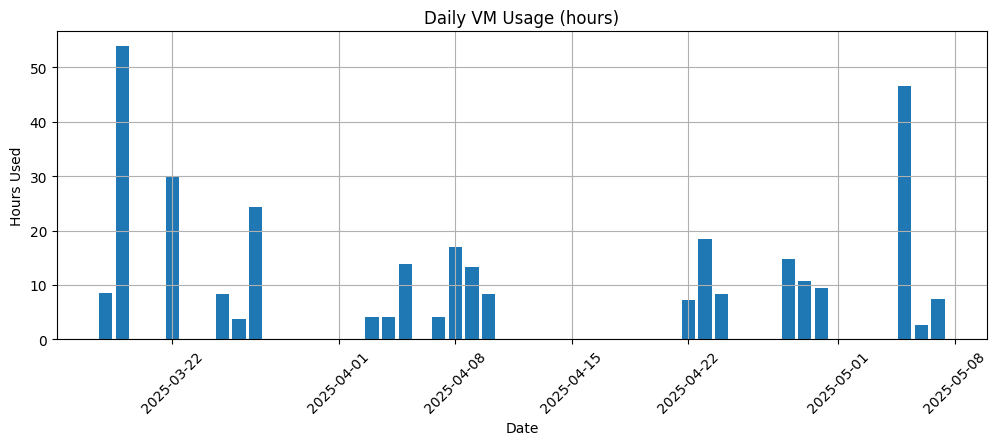

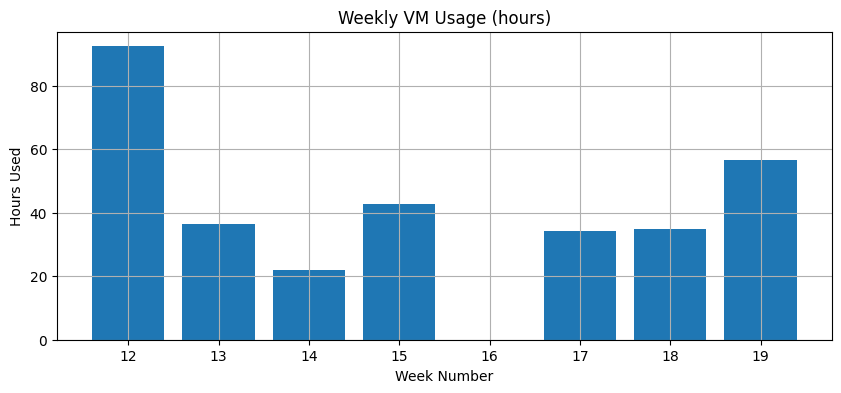

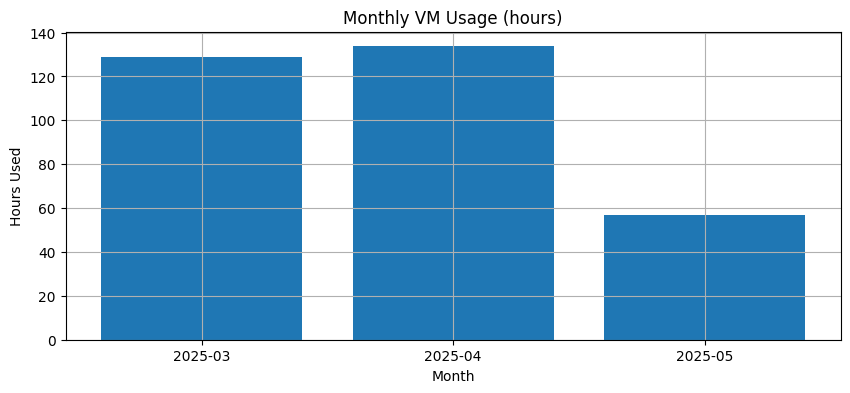

In [3]:
# Install required libraries
# Run this line once before executing the script
# !pip install -r requirements.txt

import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import defaultdict

# Load the JSON log file
with open('data/inputs/eclaims.json', 'r') as f:
    data = json.load(f)

# Prepare lists to store start and stop events with their timestamps
start_times = []
stop_times = []

# Loop through the log events to extract start and stop operations
for entry in data:
    payload = entry.get("protoPayload", {})
    method = payload.get("methodName", "")
    timestamp = entry.get("timestamp", None)
    
    if method == "v1.compute.instances.start" and timestamp:
        start_times.append(datetime.fromisoformat(timestamp.replace("Z", "+00:00")))
    elif method == "v1.compute.instances.stop" and timestamp:
        stop_times.append(datetime.fromisoformat(timestamp.replace("Z", "+00:00")))

# Sort the events chronologically
start_times.sort()
stop_times.sort()

# Match start and stop pairs to compute usage intervals
usage_sessions = []
stop_idx = 0

for start_time in start_times:
    # Find the next stop time after the start time
    while stop_idx < len(stop_times) and stop_times[stop_idx] <= start_time:
        stop_idx += 1
    if stop_idx < len(stop_times):
        usage_sessions.append((start_time, stop_times[stop_idx]))
        stop_idx += 1

# Aggregate usage time per day
daily_usage = defaultdict(timedelta)

for start, stop in usage_sessions:
    day = start.date()
    duration = stop - start
    daily_usage[day] += duration

# Convert daily usage to DataFrame for plotting
daily_df = pd.DataFrame({
    "date": list(daily_usage.keys()),
    "hours_used": [round(usage.total_seconds() / 3600, 2) for usage in daily_usage.values()]
}).sort_values("date")

# Weekly usage
daily_df['week'] = daily_df['date'].apply(lambda x: x.isocalendar()[1])
weekly_usage = daily_df.groupby('week')['hours_used'].sum().reset_index()

# Monthly usage
daily_df['month'] = daily_df['date'].apply(lambda x: x.strftime("%Y-%m"))
monthly_usage = daily_df.groupby('month')['hours_used'].sum().reset_index()

# Plot daily usage
plt.figure(figsize=(12, 4))
plt.bar(daily_df['date'], daily_df['hours_used'])
plt.title("Daily VM Usage (hours)")
plt.xlabel("Date")
plt.ylabel("Hours Used")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot weekly usage
plt.figure(figsize=(10, 4))
plt.bar(weekly_usage['week'], weekly_usage['hours_used'])
plt.title("Weekly VM Usage (hours)")
plt.xlabel("Week Number")
plt.ylabel("Hours Used")
plt.grid(True)
plt.show()

# Plot monthly usage
plt.figure(figsize=(10, 4))
plt.bar(monthly_usage['month'], monthly_usage['hours_used'])
plt.title("Monthly VM Usage (hours)")
plt.xlabel("Month")
plt.ylabel("Hours Used")
plt.grid(True)
plt.show()



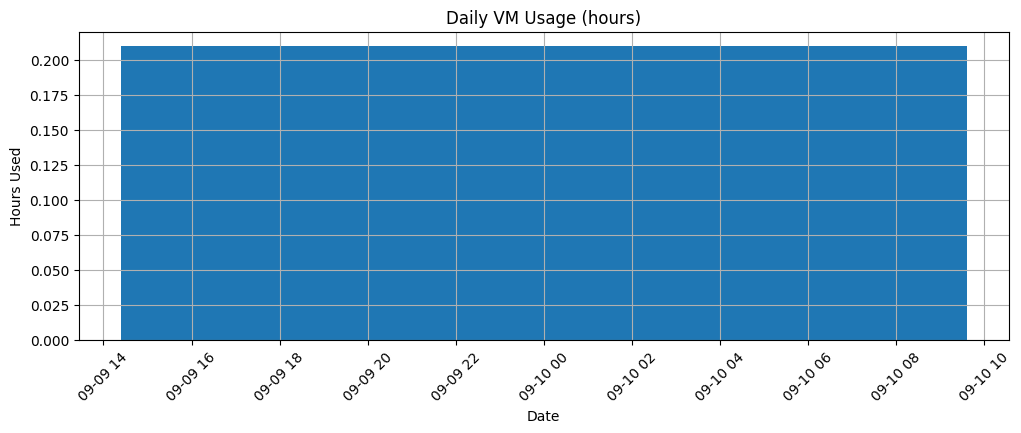

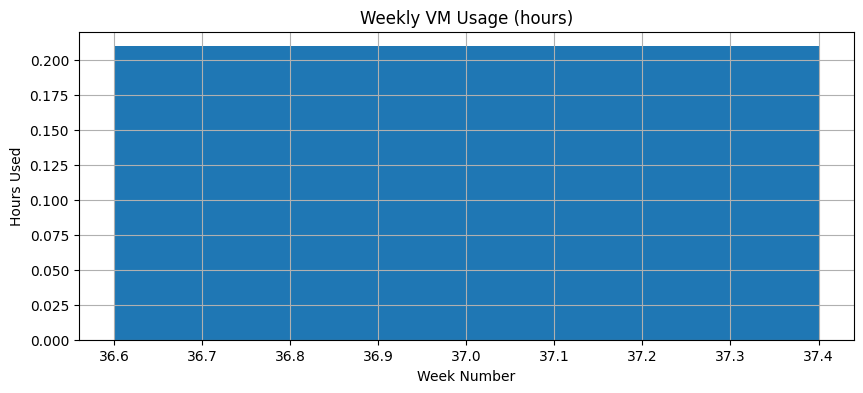

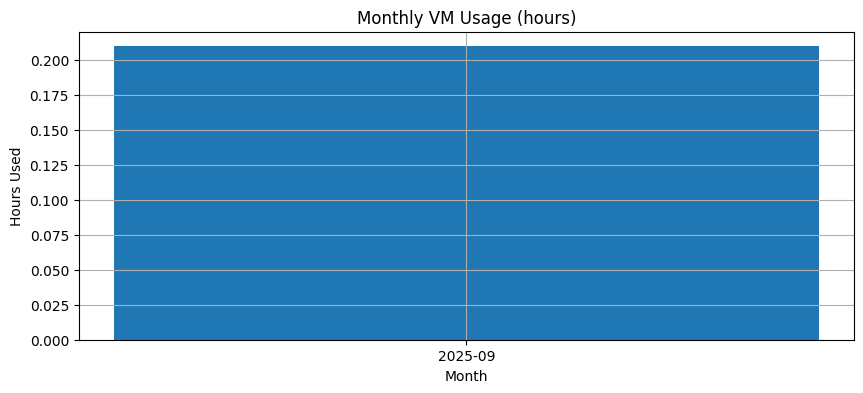

In [4]:
# Install required libraries
# Run this line once before executing the script
# !pip install -r requirements.txt

import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import defaultdict

# Load the JSON log file
with open('data/inputs/eclaims-v2.json', 'r') as f:
    data = json.load(f)

# Prepare lists to store start and stop events with their timestamps
start_times = []
stop_times = []

# Loop through the log events to extract start and stop operations
for entry in data:
    payload = entry.get("protoPayload", {})
    method = payload.get("methodName", "")
    timestamp = entry.get("timestamp", None)
    
    if method == "v1.compute.instances.start" and timestamp:
        start_times.append(datetime.fromisoformat(timestamp.replace("Z", "+00:00")))
    elif method == "v1.compute.instances.stop" and timestamp:
        stop_times.append(datetime.fromisoformat(timestamp.replace("Z", "+00:00")))

# Sort the events chronologically
start_times.sort()
stop_times.sort()

# Match start and stop pairs to compute usage intervals
usage_sessions = []
stop_idx = 0

for start_time in start_times:
    # Find the next stop time after the start time
    while stop_idx < len(stop_times) and stop_times[stop_idx] <= start_time:
        stop_idx += 1
    if stop_idx < len(stop_times):
        usage_sessions.append((start_time, stop_times[stop_idx]))
        stop_idx += 1

# Aggregate usage time per day
daily_usage = defaultdict(timedelta)

for start, stop in usage_sessions:
    day = start.date()
    duration = stop - start
    daily_usage[day] += duration

# Convert daily usage to DataFrame for plotting
daily_df = pd.DataFrame({
    "date": list(daily_usage.keys()),
    "hours_used": [round(usage.total_seconds() / 3600, 2) for usage in daily_usage.values()]
}).sort_values("date")

# Weekly usage
daily_df['week'] = daily_df['date'].apply(lambda x: x.isocalendar()[1])
weekly_usage = daily_df.groupby('week')['hours_used'].sum().reset_index()

# Monthly usage
daily_df['month'] = daily_df['date'].apply(lambda x: x.strftime("%Y-%m"))
monthly_usage = daily_df.groupby('month')['hours_used'].sum().reset_index()

# Plot daily usage
plt.figure(figsize=(12, 4))
plt.bar(daily_df['date'], daily_df['hours_used'])
plt.title("Daily VM Usage (hours)")
plt.xlabel("Date")
plt.ylabel("Hours Used")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot weekly usage
plt.figure(figsize=(10, 4))
plt.bar(weekly_usage['week'], weekly_usage['hours_used'])
plt.title("Weekly VM Usage (hours)")
plt.xlabel("Week Number")
plt.ylabel("Hours Used")
plt.grid(True)
plt.show()

# Plot monthly usage
plt.figure(figsize=(10, 4))
plt.bar(monthly_usage['month'], monthly_usage['hours_used'])
plt.title("Monthly VM Usage (hours)")
plt.xlabel("Month")
plt.ylabel("Hours Used")
plt.grid(True)
plt.show()



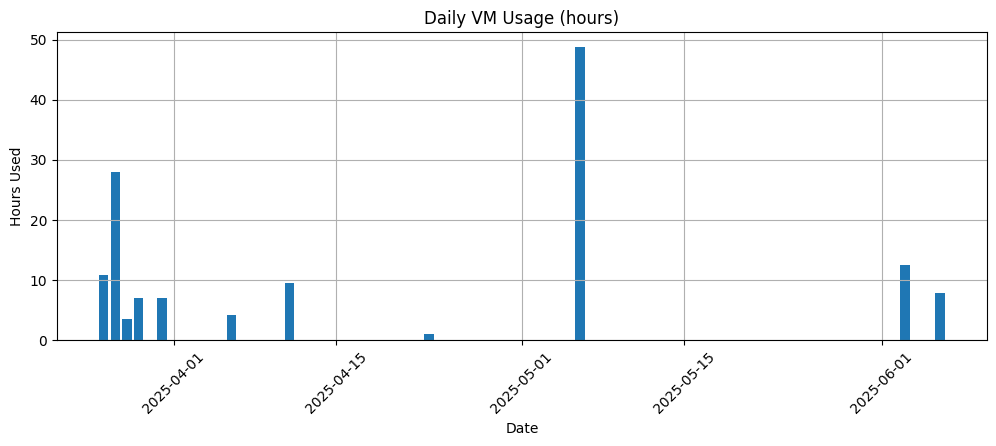

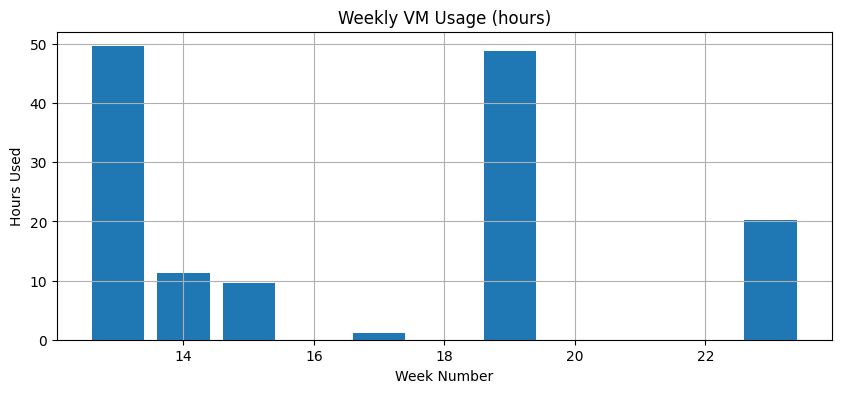

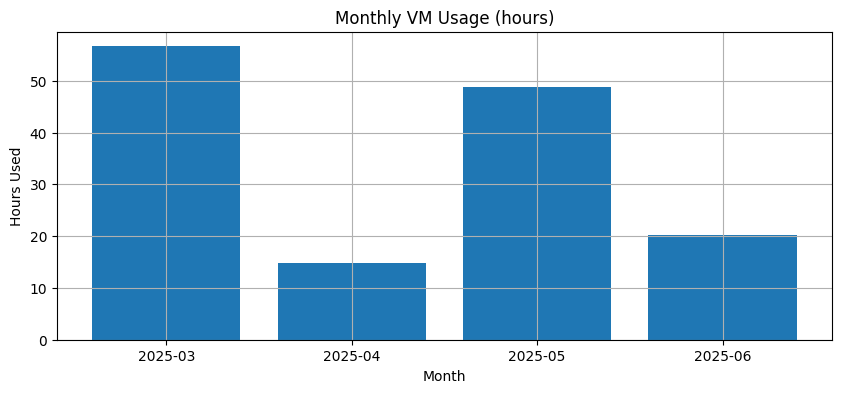

In [5]:
# Install required libraries
# Run this line once before executing the script
# !pip install -r requirements.txt

import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import defaultdict

# Load the JSON log file
with open('data/inputs/stata.json', 'r') as f:
    data = json.load(f)

# Prepare lists to store start and stop events with their timestamps
start_times = []
stop_times = []

# Loop through the log events to extract start and stop operations
for entry in data:
    payload = entry.get("protoPayload", {})
    method = payload.get("methodName", "")
    timestamp = entry.get("timestamp", None)
    
    if method == "v1.compute.instances.start" and timestamp:
        start_times.append(datetime.fromisoformat(timestamp.replace("Z", "+00:00")))
    elif method == "v1.compute.instances.stop" and timestamp:
        stop_times.append(datetime.fromisoformat(timestamp.replace("Z", "+00:00")))

# Sort the events chronologically
start_times.sort()
stop_times.sort()

# Match start and stop pairs to compute usage intervals
usage_sessions = []
stop_idx = 0

for start_time in start_times:
    # Find the next stop time after the start time
    while stop_idx < len(stop_times) and stop_times[stop_idx] <= start_time:
        stop_idx += 1
    if stop_idx < len(stop_times):
        usage_sessions.append((start_time, stop_times[stop_idx]))
        stop_idx += 1

# Aggregate usage time per day
daily_usage = defaultdict(timedelta)

for start, stop in usage_sessions:
    day = start.date()
    duration = stop - start
    daily_usage[day] += duration

# Convert daily usage to DataFrame for plotting
daily_df = pd.DataFrame({
    "date": list(daily_usage.keys()),
    "hours_used": [round(usage.total_seconds() / 3600, 2) for usage in daily_usage.values()]
}).sort_values("date")

# Weekly usage
daily_df['week'] = daily_df['date'].apply(lambda x: x.isocalendar()[1])
weekly_usage = daily_df.groupby('week')['hours_used'].sum().reset_index()

# Monthly usage
daily_df['month'] = daily_df['date'].apply(lambda x: x.strftime("%Y-%m"))
monthly_usage = daily_df.groupby('month')['hours_used'].sum().reset_index()

# Plot daily usage
plt.figure(figsize=(12, 4))
plt.bar(daily_df['date'], daily_df['hours_used'])
plt.title("Daily VM Usage (hours)")
plt.xlabel("Date")
plt.ylabel("Hours Used")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot weekly usage
plt.figure(figsize=(10, 4))
plt.bar(weekly_usage['week'], weekly_usage['hours_used'])
plt.title("Weekly VM Usage (hours)")
plt.xlabel("Week Number")
plt.ylabel("Hours Used")
plt.grid(True)
plt.show()

# Plot monthly usage
plt.figure(figsize=(10, 4))
plt.bar(monthly_usage['month'], monthly_usage['hours_used'])
plt.title("Monthly VM Usage (hours)")
plt.xlabel("Month")
plt.ylabel("Hours Used")
plt.grid(True)
plt.show()

